# PyGeM

## Tutorial 1: Free Form Deformation on a sphere

In this tutorial we will show the typical workflow to perform a deformation on a generic geometry using the *free-form deformation* method implemented within **PyGeM**. A brief teoretical overview of the method is introduced in the `pygem.ffd` module, while in the [README](https://github.com/mathLab/PyGeM#references) you can find several references that focus on **FFD**.

First of all we import the required PyGeM class and we set matplotlib for 3D plots. The version of PyGeM we are using in this tutorial is the 2.0.0.

In [1]:
%matplotlib inline
import numpy as np
import mpl_toolkits.mplot3d
import matplotlib.pyplot as plt

import pygem
print(pygem.__version__)
from pygem import FFD

2.0.0


Then, the other ingredient is the original geometry we want to deform. In this simple tutorial we just span some points around a sphere and morph their coordinates using the `FFD` class.

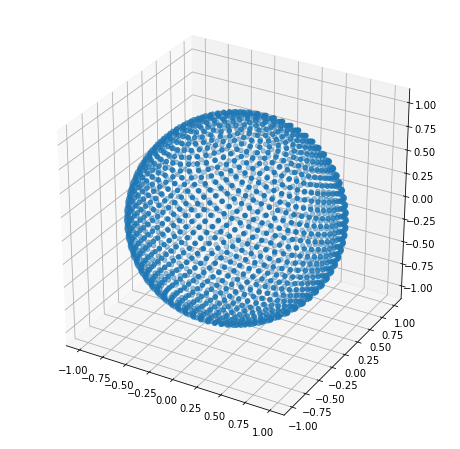

In [2]:
def mesh_points(num_pts = 2000):
    indices = np.arange(0, num_pts, dtype=float) + 0.5

    phi = np.arccos(1 - 2*indices/num_pts)
    theta = np.pi * (1 + 5**0.5) * indices

    return np.array([np.cos(theta) * np.sin(phi), np.sin(theta) * np.sin(phi), np.cos(phi)]).T

mesh = mesh_points()
plt.figure(figsize=(8,8)).add_subplot(111, projection='3d').scatter(*mesh.T);
plt.show()

Well, we have our sphere!
Now it is time to create the new instance of the `FFD` class, that will actually perform the points deformation. We can read from the [documentation](http://mathlab.github.io/PyGeM/ffd.html) that the only parameter to the `FFD` constructor is the number of control points we want to create, in the three directions. In this simple tutorial we create just a $2\times 2 \times 2$ lattice of points.

In [3]:
ffd = FFD([2, 2, 2])
print(ffd)

conversion_unit = 1.0
n_control_points = [2 2 2]

box_length = [1. 1. 1.]
box_origin = [0. 0. 0.]
rot_angle  = [0. 0. 0.]

array_mu_x =
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]

array_mu_y =
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]

array_mu_z =
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]

rotation_matrix = 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

position_vertices = [[0. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]



We can print the `FFD` object itself, in order to summarize all the parameters. It's important to note that the lattice has the default length equal to 1, the origin at $(0, 0, 0)$ and no rotation. We can edit manually these quantities to change the configuration of the lattice, but in this simple case the default values are fine.

To control the displacement of the control points, we can touch the arrays `array_mu_x`, `array_mu_y` and `array_mu_z`: these structures contain the movements in the three directions of all the lattice points. By default, the movements is imposed to zero but we can change those values to apply the deformation. It is important to know also that the points movement is normalized by the length of the lattice.

Let's try together to move a point. We can manipulate the movements of each point along a specific direction by accessing to the relative array: in this case we move the right-top-rear point!

In [4]:
print('Movements of point[{}, {}, {}] along x: {}'.format(1, 1, 1, ffd.array_mu_x[1, 1, 1]))
print('Movements of point[{}, {}, {}] along z: {}'.format(1, 1, 1, ffd.array_mu_z[1, 1, 1]))

ffd.array_mu_x[1, 1, 1] = 2
ffd.array_mu_z[1, 1, 1] = 0.8
print()
print('Movements of point[{}, {}, {}] along x: {}'.format(1, 1, 1, ffd.array_mu_x[1, 1, 1]))
print('Movements of point[{}, {}, {}] along z: {}'.format(1, 1, 1, ffd.array_mu_z[1, 1, 1]))

Movements of point[1, 1, 1] along x: 0.0
Movements of point[1, 1, 1] along z: 0.0

Movements of point[1, 1, 1] along x: 2.0
Movements of point[1, 1, 1] along z: 0.8


Now we can deform our sphere (in particular the coordinates of the points that define it) just calling the `__call__()` method and passing to it the numpy array of the points coordinates.

In [5]:
new_mesh = ffd(mesh)
print(type(new_mesh), new_mesh.shape)

<class 'numpy.ndarray'> (2000, 3)


Done! The new array (in this tutorial the array `new_mesh`) contains the deformed coordinates. To visualize the new shape, we plot the sphere points and, in red, the control points.

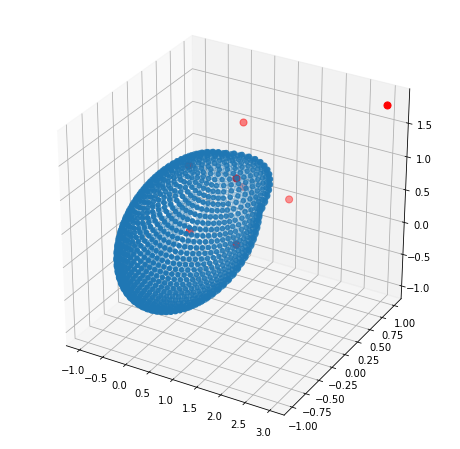

In [6]:
ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')
ax.scatter(*new_mesh.T)
ax.scatter(*ffd.control_points().T, s=50, c='red')
plt.show()